In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import brewer2mpl #библиотека работы с цветовой палитрой Brewer2mpl
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 12

In [2]:
path='C:\Users\Pavel_2\Desktop\Hedge\\'
txtTiker='XPD_60'

df=pd.read_table(path+txtTiker+'.txt',sep=',',names=['Date','Time','Open','High','Low','Close','Volume'])
# если не указать header=None то первая строка будет принята как header
del df['Volume']
df.head(5) # df означает объект DataFrame Pandas 

,Date,Time,Open,High,Low,Close
0,01/01/2008,800,369.50,369.50,369.5,369.5
1,02/01/2008,300,369.00,369.00,369.0,369.0
2,02/01/2008,500,369.25,369.50,368.5,368.5
3,02/01/2008,800,369.50,370.00,369.0,369.5
4,02/01/2008,900,369.25,369.25,368.0,368.0


In [3]:
# данные были взяты в российском поясе времени, потому существуют последствия перевода времени.
# на 240мин барах иногда нет времени 2200 потому нельзя объединить две таблицы данных одним merge
df_2200=df[df['Time']==2200]
df_2200

,Date,Time,Open,High,Low,Close
16,02/01/2008,2200,374.75,375.50,373.00,374.00
35,03/01/2008,2200,372.75,372.75,372.50,372.50
57,04/01/2008,2200,365.13,366.50,364.50,365.50
78,07/01/2008,2200,370.25,371.50,369.50,370.50
98,08/01/2008,2200,375.50,377.50,375.50,376.75
119,09/01/2008,2200,376.75,377.00,374.50,375.50
134,10/01/2008,2200,375.25,375.50,375.00,375.50
156,11/01/2008,2200,377.75,378.00,377.75,378.00
175,14/01/2008,2200,381.20,381.63,381.20,381.50
193,15/01/2008,2200,379.50,380.13,379.50,379.50


In [4]:
df_2100=df[df['Time']==2100]
df_2100[:10]

,Date,Time,Open,High,Low,Close
15,02/01/2008,2100,373.02,376.00,372.00,374.50
34,03/01/2008,2100,373.70,374.50,372.00,373.00
56,04/01/2008,2100,370.94,372.50,358.35,365.00
77,07/01/2008,2100,371.90,372.50,368.75,368.75
97,08/01/2008,2100,376.07,377.40,374.75,375.50
118,09/01/2008,2100,377.63,378.50,375.00,377.00
133,10/01/2008,2100,374.38,375.65,373.50,375.50
155,11/01/2008,2100,376.56,377.00,376.25,377.00
174,14/01/2008,2100,379.72,382.95,379.72,380.90
192,15/01/2008,2100,376.72,380.25,376.72,379.00


In [5]:
txtTest='XPD_Test3L_120'
test=pd.read_table(path+txtTest+'.txt',sep=',')
test.head(5) 

,Date,Time,Type,Cnts,Price,Signal_Name
0,02/01/2008,1900,Buy,2677,373.50,OL
1,04/01/2008,2100,LExit,2677,366.80,ELS
2,08/01/2008,1500,Buy,2670,374.50,OL
3,10/01/2008,1700,LExit,2670,369.90,ELS
4,14/01/2008,1300,Buy,2616,382.25,OL


In [6]:
test_2200=test[test['Time']==2200]
test_2200[:10]

,Date,Time,Type,Cnts,Price,Signal_Name


In [7]:
Time_R=test.Time#.replace(2200,2000)
Time_R[:5]
#print len(Time_R)

0    1900
1    2100
2    1500
3    1700
4    1300
Name: Time, dtype: int64

In [8]:
test_2100=test[test['Time']==2100]
test_2100[:10]

,Date,Time,Type,Cnts,Price,Signal_Name
1,04/01/2008,2100,LExit,2677,366.80,ELS
9,12/02/2008,2100,LExit,2290,427.50,EL
46,10/07/2008,2100,Buy,2214,451.50,OL
52,13/08/2008,2100,Buy,1524,318.50,OL
56,11/09/2008,2100,Buy,2028,232.00,OL
58,17/09/2008,2100,Buy,3363,230.00,OL
61,02/10/2008,2100,LExit,1678,198.30,ELS
82,15/01/2009,2100,Buy,3286,180.50,OL
86,30/01/2009,2100,Buy,5167,193.50,OL
93,09/03/2009,2100,LExit,5141,195.27,EL


In [9]:
del test['Time']
test['Time']=Time_R
names=['Date','Time','Type','Cnts','Price','Signal_Name']
# меняем порядок следования столбцов
test=test.reindex(columns=names)
test[:5]

,Date,Time,Type,Cnts,Price,Signal_Name
0,02/01/2008,1900,Buy,2677,373.50,OL
1,04/01/2008,2100,LExit,2677,366.80,ELS
2,08/01/2008,1500,Buy,2670,374.50,OL
3,10/01/2008,1700,LExit,2670,369.90,ELS
4,14/01/2008,1300,Buy,2616,382.25,OL


In [10]:
# замена актуальна для таймфрейма 120/240 минут
#test.loc[367,'Time']=2100
#test.loc[371,'Time']=2100
#test.loc[374,'Time']=2100
test[test['Time']==2100][-5:]

,Date,Time,Type,Cnts,Price,Signal_Name
593,14/07/2015,2100,LExit,1511,653.80,EL
616,17/09/2015,2100,Buy,932,617.40,OL
635,28/10/2015,2100,LExit,1450,672.40,ELS
655,28/01/2016,2100,LExit,2006,488.00,ELS
684,09/06/2016,2100,Buy,1775,563.25,OL


In [11]:
print len(test), len(df)

688 49979


In [12]:
#Time_R=test.Time.replace(2200,2000)
Time_R=test.Time # для XPT НЕ делаем замену времени 
Time_R[:5]
#print len(Time_R)

0    1900
1    2100
2    1500
3    1700
4    1300
Name: Time, dtype: int64

In [13]:
merge_df=pd.merge(df,test,on=['Date','Time'],how='outer') 
merge_df.fillna(0,inplace=True)
merge_df[-10:]

,Date,Time,Open,High,Low,Close,Type,Cnts,Price,Signal_Name
49969,20/06/2016,700,539.65,539.67,538.41,539.57,0,0.0,0.0,0
49970,20/06/2016,800,539.57,539.59,536.70,537.45,0,0.0,0.0,0
49971,20/06/2016,900,537.45,540.26,536.41,539.54,0,0.0,0.0,0
49972,20/06/2016,1000,539.54,542.07,538.53,541.41,0,0.0,0.0,0
49973,20/06/2016,1100,541.38,544.94,539.79,544.29,0,0.0,0.0,0
49974,20/06/2016,1200,544.31,544.48,540.78,541.43,0,0.0,0.0,0
49975,20/06/2016,1300,541.43,542.53,539.42,540.12,0,0.0,0.0,0
49976,20/06/2016,1400,540.12,541.75,538.49,541.50,0,0.0,0.0,0
49977,20/06/2016,1500,541.50,547.78,540.23,544.37,0,0.0,0.0,0
49978,20/06/2016,1600,544.37,545.27,542.55,543.50,0,0.0,0.0,0


In [14]:
print len(merge_df)
print type(merge_df)

49979
<class 'pandas.core.frame.DataFrame'>


In [15]:
# merge_df=merge_df[:150]
# print merge_df

In [16]:
merge_df[merge_df['Signal_Name']<>0][:15]

,Date,Time,Open,High,Low,Close,Type,Cnts,Price,Signal_Name
13,02/01/2008,1900,375.82,375.82,372.75,373.50,Buy,2677.0,373.50,OL
56,04/01/2008,2100,370.94,372.50,358.35,365.00,LExit,2677.0,366.80,ELS
91,08/01/2008,1500,374.25,374.50,373.97,374.50,Buy,2670.0,374.50,OL
129,10/01/2008,1700,371.50,373.25,369.50,373.00,LExit,2670.0,369.90,ELS
166,14/01/2008,1300,382.50,382.50,380.25,382.25,Buy,2616.0,382.25,OL
202,16/01/2008,1300,375.63,375.63,371.50,373.50,LExit,2616.0,373.80,ELS
280,22/01/2008,1900,365.88,367.50,364.50,367.50,Buy,2721.0,367.50,OL
473,05/02/2008,1300,413.05,416.72,408.35,413.50,LExit,2721.0,413.50,EL
537,08/02/2008,1700,432.05,437.00,430.00,436.50,Buy,2290.0,436.50,OL
582,12/02/2008,2100,426.21,432.25,425.10,427.50,LExit,2290.0,427.50,EL


In [17]:
# merge_df.to_csv(path_or_buf='NI_240_obr.txt', sep=',')

In [18]:
# в  Python если итерироваться по объекту (DataFrame,  Serios) то этот обэект нельзя менять
# а нам нужно дописать новые столбцы в DataFrame данные из которых будут расчитаны исходя их данных текущих столбцов
# я нашел два способа решать это
# 1 выделить отдельный объкт по нему проходить получая (допустим) номер строки  DataFrame
# 2 итерировать сам объект DataFrame записывая новые данные в другой объеект, а потом мерджить два объекта
Index1=merge_df.index
#print Index1
Index2=[0 for _ in xrange(len(merge_df))]
#print Index2, len(Index2)

In [19]:
# 1 вариант
merge_df['Pozition']=0 # добавляем столбец Pozition
POZ=0 # начальное значение позиции
for i in (Index1): 
#for i, index in  enumerate (Index2): 
#for i in (Index2):  не работает т.к. там для i поступают значения из Index2 а это =0
    if merge_df.loc[i,'Signal_Name']=='EL' or merge_df.loc[i,'Signal_Name']=='ELS':
        POZ=0
    if merge_df.loc[i,'Signal_Name']=='OL' or POZ==1:
        merge_df.loc[i,'Pozition']=1
        POZ=1        
    else:
        merge_df.loc[i,'Pozition']=0
#merge_df[75:125]

In [20]:
# 2 вариант быстрее
PozList=[]
POZ=0 # начальное значение позиции
for i,row in merge_df.iterrows():    
    if row['Signal_Name']=='EL' or row['Signal_Name']=='ELS':
        POZ=0
    if row['Signal_Name']=='OL' or POZ==1:
        PozList.append(1)
        POZ=1        
    else:
        PozList.append(0)   
print PozList[:150]  

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
del merge_df['Pozition'] # если не запускался первый вариант тут будет исключение
#merge_df[75:125]

In [22]:
merge_df['Pozition']=PozList
#merge_df[75:125]

In [23]:
merge_df[merge_df['Signal_Name']<>0][:10]

,Date,Time,Open,High,Low,Close,Type,Cnts,Price,Signal_Name,Pozition
13,02/01/2008,1900,375.82,375.82,372.75,373.50,Buy,2677.0,373.50,OL,1
56,04/01/2008,2100,370.94,372.50,358.35,365.00,LExit,2677.0,366.80,ELS,0
91,08/01/2008,1500,374.25,374.50,373.97,374.50,Buy,2670.0,374.50,OL,1
129,10/01/2008,1700,371.50,373.25,369.50,373.00,LExit,2670.0,369.90,ELS,0
166,14/01/2008,1300,382.50,382.50,380.25,382.25,Buy,2616.0,382.25,OL,1
202,16/01/2008,1300,375.63,375.63,371.50,373.50,LExit,2616.0,373.80,ELS,0
280,22/01/2008,1900,365.88,367.50,364.50,367.50,Buy,2721.0,367.50,OL,1
473,05/02/2008,1300,413.05,416.72,408.35,413.50,LExit,2721.0,413.50,EL,0
537,08/02/2008,1700,432.05,437.00,430.00,436.50,Buy,2290.0,436.50,OL,1
582,12/02/2008,2100,426.21,432.25,425.10,427.50,LExit,2290.0,427.50,EL,0


In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
len(merge_df)

49979

In [26]:
OpenEquityCurve=[]
CloseEquityCurve=[]
DrawDownLine=[]
InitalCapital=1000000 # начальное значение EquityCurve

openEquityCurve=closeEquityCurve=InitalCapital # инициализируем первоначальное значение EquityCurve
#closeEquityCurve=InitalCapital
maxEquityCurve=InitalCapital # инициализируем MaxEquityCurve для расчета DrawDownLine 

for i,row in merge_df.iterrows(): 
    # расчет кривой EquityCurve
    if i==1: 
        openEquityCurve=closeEquityCurve=InitalCapital # инициализируем первоначальное значение EquityCurve
        #closeEquityCurve=InitalCapital
        maxEquityCurve=InitalCapital # инициализируем MaxEquityCurve для расчета DrawDownLine 
        
    if row['Signal_Name']=='OL' :
        PozEnter=row['Price']
        Cnts=row['Cnts']
        equityCurve_=openEquityCurve # при открытии позиции и закрытии openEquityCurve и closeEquityCurve совпадают!
    if row['Pozition']==1 :
        grossResult=Cnts*(row['Close']-PozEnter)  
        openEquityCurve=equityCurve_+grossResult   
    if row['Signal_Name']=='EL' or row['Signal_Name']=='ELS':
        grossResult=Cnts*(row['Price']-PozEnter) # row['Price'] а не row['Close'] поскольу при 'Signal_Name'=='ELS' выход не по Close
        openEquityCurve=equityCurve_+grossResult  
        closeEquityCurve=openEquityCurve
        PozEnter=0
        Cnts=0
        
    OpenEquityCurve.append(openEquityCurve)
    CloseEquityCurve.append(closeEquityCurve) 
    # расчет кривой DrawDown%
    
    maxEquityCurve=max(maxEquityCurve,openEquityCurve)
    drawDownLine=(openEquityCurve-maxEquityCurve)/maxEquityCurve*100 # drawDownLine в %    
    DrawDownLine.append(drawDownLine)
    
#print EquityCurve[-150:]  

In [27]:
Date=merge_df['Date']
Date[:10]

0    01/01/2008
1    02/01/2008
2    02/01/2008
3    02/01/2008
4    02/01/2008
5    02/01/2008
6    02/01/2008
7    02/01/2008
8    02/01/2008
9    02/01/2008
Name: Date, dtype: object

In [28]:
import datetime as dt
# dayfirst : boolean, default False // yearfirst : boolean, default False    
Date=pd.to_datetime(merge_df['Date'],dayfirst=True)
print Date[:10]
print type(Date)
# 'это объект Series его как то можно запихнуть в plt.plot, но plt.fill_between его не понимает

0   2008-01-01
1   2008-01-02
2   2008-01-02
3   2008-01-02
4   2008-01-02
5   2008-01-02
6   2008-01-02
7   2008-01-02
8   2008-01-02
9   2008-01-02
Name: Date, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>


In [29]:
Date=pd.to_datetime(list(merge_df['Date']),dayfirst=True)
print Date[:10]
print type(Date)

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-02', '2008-01-02',
               '2008-01-02', '2008-01-02', '2008-01-02', '2008-01-02',
               '2008-01-02', '2008-01-02'],
              dtype='datetime64[ns]', freq=None)
<class 'pandas.tseries.index.DatetimeIndex'>


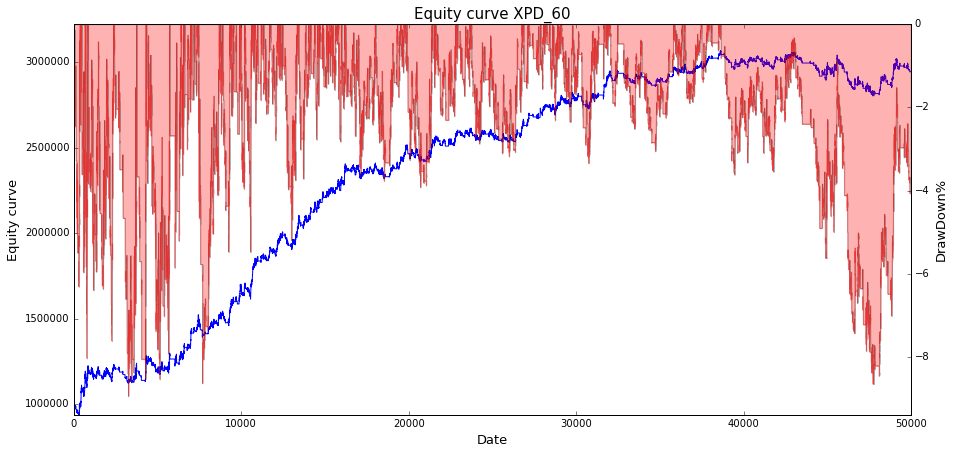

In [30]:
plt.figure(figsize=(15, 7))
plt.plot(OpenEquityCurve,"b-",linewidth=1,alpha=1)
#plt.plot(CloseEquityCurve,"g-",linewidth=1)
plt.xlabel('Date',fontsize=13)
plt.ylabel('Equity curve',fontsize=13)
plt.ylim(min(OpenEquityCurve),1.05*max(OpenEquityCurve))

plt.twinx()
plt.plot(DrawDownLine,"r-",linewidth=0.5,alpha=0.60)
plt.ylabel('DrawDown%',fontsize=13)
plt.xlim(0,len(merge_df))
plt.ylim(1.05*min(DrawDownLine),0)

plt.title("Equity curve "+ txtTiker,fontsize=15)
#plt.xlim(0,1100)
#plt.fill(Index1,DrawDownLine,'r',alpha=0.50) # не работает верно, заполняет от уровня -5
plt.fill_between(Index1, 0, DrawDownLine, facecolor='red',alpha=0.30)
plt.show()

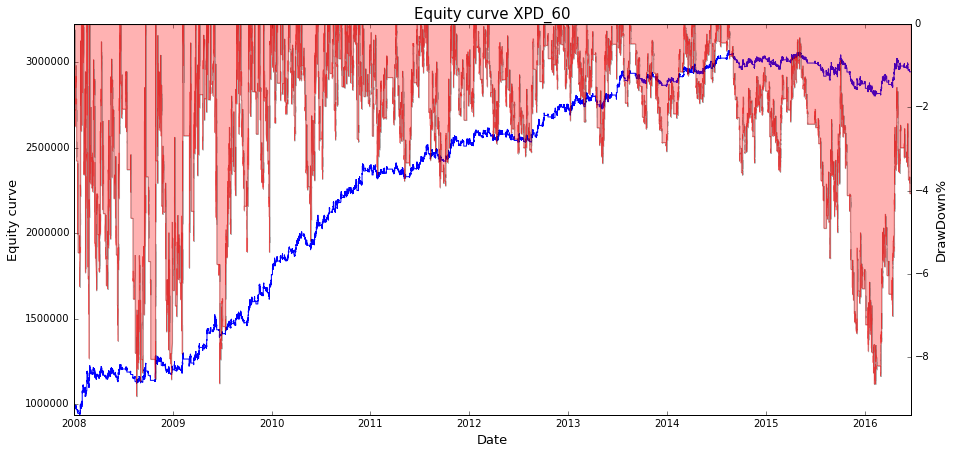

In [31]:
plt.figure(figsize=(15, 7))
plt.plot(Date,OpenEquityCurve,"b-",linewidth=1,alpha=1)
#plt.plot(CloseEquityCurve,"g-",linewidth=1)
plt.xlabel('Date',fontsize=13)
plt.ylabel('Equity curve',fontsize=13)
plt.ylim(min(OpenEquityCurve),1.05*max(OpenEquityCurve))

plt.twinx()
plt.plot(Date,DrawDownLine,"r-",linewidth=0.5,alpha=0.60)
plt.ylabel('DrawDown%',fontsize=13)
plt.ylim(1.05*min(DrawDownLine),0)

plt.title("Equity curve " + txtTiker,fontsize=15)
#plt.xlim('2007-01-01','2016-06-15')
plt.fill_between(Date, 0, DrawDownLine, facecolor='red',alpha=0.30)
plt.savefig(path+txtTest+'.png')
plt.show()

In [32]:
# два способа преобразования строки в формат datetime
# неодобен тем что требует постоянно указывать формат даты
import datetime as dt
StartData='2000-01-01'
dt.datetime.strptime(StartData,'%Y-%m-%d') # обязательно два аргумента

datetime.datetime(2000, 1, 1, 0, 0)

In [33]:
from dateutil.parser import parse
parse('2000-01-01')

datetime.datetime(2000, 1, 1, 0, 0)

In [34]:
# поскоьку merge_df не проиндексирщвана через DatetimeIndex по получить номера соответствующих StartData и EndData
# необходимо использую метод slice_locs который дает int значения соответствующих позиций
MarketPrice=merge_df['Close']
MarketPrice.index=Date
StartData=parse('2016-01-01')
EndData=parse('2016-01-04')
EndAllData=Date[-1]

Date_ind=Date.slice_locs(start=StartData, end=EndData)
print Date_ind[0],Date_ind[1]

47091 47130


In [35]:
merge_df['Pozition'][Date_ind[0]:Date_ind[1]]

47091    1
47092    1
47093    1
47094    1
47095    1
47096    1
47097    1
47098    1
47099    1
47100    1
47101    1
47102    1
47103    1
47104    1
47105    1
47106    1
47107    1
47108    1
47109    1
47110    1
47111    1
47112    1
47113    1
47114    1
47115    1
47116    1
47117    1
47118    1
47119    1
47120    1
47121    1
47122    1
47123    1
47124    1
47125    1
47126    1
47127    1
47128    1
47129    0
Name: Pozition, dtype: int64

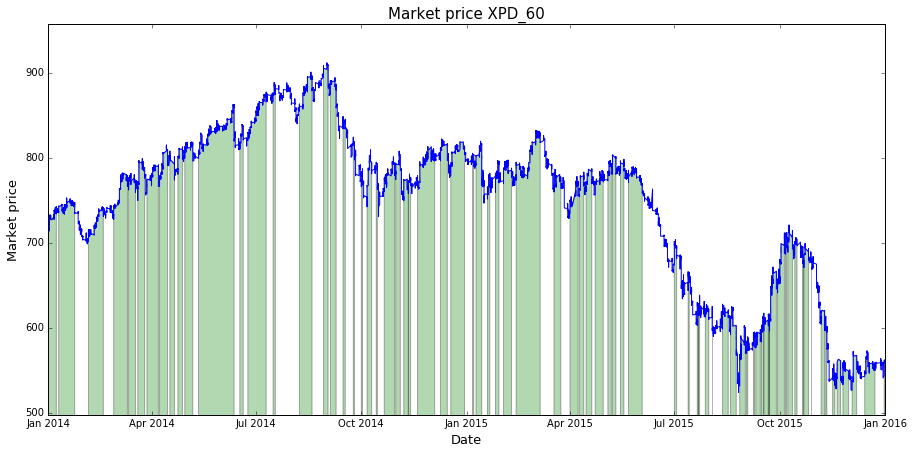

In [36]:
MarketPrice=merge_df['Close']
MarketPrice.index=Date
StartData=parse('2014-01-01')
EndData=parse('2016-01-01')
EndAllData=Date[-1]
Date_ind=Date.slice_locs(start=StartData, end=EndData)
MarketPrice_forGraf=MarketPrice[StartData:EndData]
Date_forGraf=MarketPrice_forGraf.index # необходим для fill_between where=merge_df['Pozition'][Date_ind[0]:Date_ind[1]]==1

plt.figure(figsize=(15, 7))
plt.plot(MarketPrice_forGraf,"b-",linewidth=1,alpha=1)
plt.xlabel('Date',fontsize=13)
plt.ylabel('Market price',fontsize=13)
plt.ylim(0.95*min(MarketPrice_forGraf),1.05*max(MarketPrice_forGraf))

plt.title("Market price " + txtTiker,fontsize=15)
# все аргументы Date_forGraf, MarketPrice_forGraf, и where! должны быть одной размерности иначе будет ошибка
# Argument dimensions are incompatible

plt.fill_between(Date_forGraf,0, MarketPrice_forGraf,where=merge_df['Pozition'][Date_ind[0]:Date_ind[1]]==1, facecolor='green',alpha=0.30)
#plt.fill_between(Date_forGraf,0, 1.05*max(MarketPrice_forGraf),where=merge_df['Pozition'][Date_ind[0]:Date_ind[1]]==1, facecolor='green',alpha=0.30)
plt.savefig(path+txtTiker+'.png')
plt.show()

In [37]:
merge_df[:10]

,Date,Time,Open,High,Low,Close,Type,Cnts,Price,Signal_Name,Pozition
0,01/01/2008,800,369.50,369.50,369.50,369.5,0,0.0,0.0,0,0
1,02/01/2008,300,369.00,369.00,369.00,369.0,0,0.0,0.0,0,0
2,02/01/2008,500,369.25,369.50,368.50,368.5,0,0.0,0.0,0,0
3,02/01/2008,800,369.50,370.00,369.00,369.5,0,0.0,0.0,0,0
4,02/01/2008,900,369.25,369.25,368.00,368.0,0,0.0,0.0,0,0
5,02/01/2008,1000,368.25,371.00,368.25,369.0,0,0.0,0.0,0,0
6,02/01/2008,1100,369.25,370.50,368.50,368.5,0,0.0,0.0,0,0
7,02/01/2008,1200,369.50,370.00,367.50,370.0,0,0.0,0.0,0,0
8,02/01/2008,1300,369.50,369.50,368.00,369.0,0,0.0,0.0,0,0
9,02/01/2008,1400,370.50,371.50,369.63,370.0,0,0.0,0.0,0,0


In [38]:
# avg_df=merge_df  так просто присваивается ссылка и последующие изменения в avg_df будут отражаться! в merge_df

avg_df=merge_df[merge_df['Time']==2000].copy() # ==2000 делает на одной сделке запаздывание поскольку
# сигнал приходит в 2100 а мы его будем учитывать только на следующтй день поскольку удаляем бары с временем 2100
# 01/03/2016	2100	Buy	115	8675.0	OL

# DataFrame(avg_df) выдаст ошибку - DataFrame constructor not properly called!
# DataFrame constructor Parameters :
# data : numpy ndarray (structured or homogeneous), dict, or DataFrame Dict can contain Series, arrays, constants, or list-like objects

# нужно привести сначала в np.array и потом снова в DataFrame  
import numpy as np
avg_df=np.array(avg_df)
avg_df[:5]

array([['02/01/2008', 2000L, 373.75, 374.5, 373.5, 373.55, 0, 0.0, 0.0, 0,
        1L],
       ['03/01/2008', 2000L, 374.25, 375.0, 373.0, 373.65, 0, 0.0, 0.0, 0,
        1L],
       ['04/01/2008', 2000L, 371.25, 371.5, 369.5, 370.38, 0, 0.0, 0.0, 0,
        1L],
       ['07/01/2008', 2000L, 368.69, 371.75, 368.5, 371.5, 0, 0.0, 0.0, 0,
        0L],
       ['08/01/2008', 2000L, 376.0, 379.65, 374.75, 374.75, 0, 0.0, 0.0, 0,
        1L]], dtype=object)

In [39]:
from pandas import Series, DataFrame # name 'DataFrame' is not defined
avg_df=DataFrame(avg_df,columns=merge_df.columns)
avg_df.drop(avg_df.columns[[2,3,4,6,7,8,9]],axis=1,inplace=True)

avg_df.index=pd.to_datetime(avg_df.Date,dayfirst=True)
avg_df['Year']=avg_df.index.year
avg_df['Month']=avg_df.index.month
#del avg_df['Date']

names=['Year','Month','Time','Close','Pozition']
avg_df=avg_df.reindex(columns=names)
#avg_df[avg_df['Time']==2100]
avg_df[:15]

,Year,Month,Time,Close,Pozition
Date,,,,,
2008-01-02,2008,1,2000,373.55,1
2008-01-03,2008,1,2000,373.65,1
2008-01-04,2008,1,2000,370.38,1
2008-01-07,2008,1,2000,371.5,0
2008-01-08,2008,1,2000,374.75,1
2008-01-09,2008,1,2000,376.75,1
2008-01-10,2008,1,2000,374.25,0
2008-01-11,2008,1,2000,376.38,0
2008-01-14,2008,1,2000,379.6,1


In [40]:
print avg_df.index[0]
print avg_df.index[-1] , avg_df.index[-1].year, avg_df.index[-1].month # без -1: не будет работать для avg_df.Date[0].year

2008-01-02 00:00:00
2016-06-17 00:00:00 2016 6


In [41]:
_timedelta=(avg_df.index[2897]-avg_df.index[0])
_timedelta.to_pytimedelta()

_timedelta.to_timedelta64()

IndexError: index 2897 is out of bounds for axis 0 with size 2176

In [42]:
# No numeric types to aggregate по Close -object не будет работать groupby
avg_df.dtypes

Year         int32
Month        int32
Time        object
Close       object
Pozition    object
dtype: object

In [43]:
avg_df["Close"]=avg_df["Close"].astype(float)
avg_df.dtypes

Year          int32
Month         int32
Time         object
Close       float64
Pozition     object
dtype: object

In [44]:
# находим мин/макс значения в интервале 5 дней
AverageCloseMax=[]
AverageCloseMin=[]

period=5
j=0
for i,row in avg_df.iterrows(): 
    j+=1
    valueClose=row['Close']
    if j==1: # i==0
        maxClose=minClose=valueClose # инициализируем первоначальные значения
        
    maxClose=max(maxClose,valueClose)
    minClose=min(minClose,valueClose)
    
    if j==period: 
        j=0 # сбрасываем счетчик периода  
        AverageCloseMax.append(maxClose) # продаем только на максимуме допустим        
        AverageCloseMin.append(minClose) # min нужен что понять как продается в случае использования Pozition
    else:
        AverageCloseMax.append(np.nan)
        AverageCloseMin.append(np.nan) 

print AverageCloseMax[:15]  
print AverageCloseMin[:15]  

[nan, nan, nan, nan, 374.75, nan, nan, nan, nan, 379.6, nan, nan, nan, nan, 372.13]
[nan, nan, nan, nan, 370.38, nan, nan, nan, nan, 374.25, nan, nan, nan, nan, 362.0]


In [45]:
# пример показывает что для дальнейших расчетов лучше писать в list np.nan, а не 0
A=AverageCloseMax[:15]  
B=AverageCloseMin[:15] 
print np.nanmean(A)
print np.nanmean(B)

375.493333333
368.876666667


In [46]:
# необходимо добавить файлы как столбцы к avg_df и применить group_by по столбцу Year
avg_df['Nd_Max']=AverageCloseMax
avg_df['Nd_Min']=AverageCloseMin
avg_df[:10]

,Year,Month,Time,Close,Pozition,Nd_Max,Nd_Min
Date,,,,,,,
2008-01-02,2008,1,2000,373.55,1,NaN,NaN
2008-01-03,2008,1,2000,373.65,1,NaN,NaN
2008-01-04,2008,1,2000,370.38,1,NaN,NaN
2008-01-07,2008,1,2000,371.50,0,NaN,NaN
2008-01-08,2008,1,2000,374.75,1,374.75,370.38
2008-01-09,2008,1,2000,376.75,1,NaN,NaN
2008-01-10,2008,1,2000,374.25,0,NaN,NaN
2008-01-11,2008,1,2000,376.38,0,NaN,NaN
2008-01-14,2008,1,2000,379.60,1,NaN,NaN


In [47]:
avg_group=avg_df.groupby(avg_df['Year'])['Close','Nd_Max'].mean()
avg_group['%%']=(avg_group['Nd_Max']-avg_group['Close'])*100/avg_group['Close']
pd.options.display.float_format='{: .2f}'.format
avg_group

,Close,Nd_Max,%%
Year,,,
2008,351.89,362.97,3.15
2009,265.54,269.28,1.41
2010,529.85,541.20,2.14
2011,731.24,750.33,2.61
2012,644.84,656.15,1.75
2013,725.85,736.91,1.52
2014,803.66,812.67,1.12
2015,690.05,704.05,2.03
2016,545.55,557.13,2.12


In [48]:
# Сделаем в цикле перебор по нескольким period
period=[5,7,10,15,20,25,30]
#period=[5,7,10,15,30]
names_columns=[]

for periods in period:
    AverageCloseMax=[]
    AverageCloseMin=[]
    j=0
    for i,row in avg_df.iterrows(): 
        j+=1
        valueClose=row['Close']
        if j==1: # i==0
            maxClose=minClose=valueClose # инициализируем первоначальные значения

        maxClose=max(maxClose,valueClose)
        minClose=min(minClose,valueClose)
        if j==periods: 
            j=0 # сбрасываем счетчик периода  
            AverageCloseMax.append(maxClose) # продаем только на максимуме допустим        
            #AverageCloseMin.append(minClose) # min нужен что понять как продается в случае использования Pozition
        else:
            AverageCloseMax.append(np.nan)
            #AverageCloseMin.append(np.nan) 
            
    avg_df[str(periods)+'D_Max']=AverageCloseMax
    #avg_df[str(periods)+'D_Min']=AverageCloseMin
    names_columns.append(str(periods)+'D_Max')

names_columns.insert(0,'Close') # добавляем название столбца 'Close' в список столбцов
avg_group=avg_df.groupby(avg_df['Year'])[names_columns].mean()
avg_group

,Close,5D_Max,7D_Max,10D_Max,15D_Max,20D_Max,25D_Max,30D_Max
Year,,,,,,,,
2008,351.89,362.97,369.93,375.79,382.80,400.04,399.57,411.32
2009,265.54,269.28,270.42,271.69,276.31,269.19,273.40,276.58
2010,529.85,541.20,545.03,549.54,553.57,550.41,545.89,553.25
2011,731.24,750.33,752.04,758.39,770.49,776.75,786.12,786.67
2012,644.84,656.15,659.63,663.26,665.89,672.26,677.29,681.29
2013,725.85,736.91,741.89,746.13,752.07,757.47,757.36,756.77
2014,803.66,812.67,814.19,816.82,821.76,820.97,824.01,835.81
2015,690.05,704.05,711.47,717.25,721.31,738.47,740.25,752.67
2016,545.55,557.13,561.04,563.92,574.34,577.73,581.98,582.09


In [49]:
new_names_columns=[]
for names_columns_ in names_columns:
    avg_group['%'+names_columns_]=(avg_group[names_columns_]-avg_group['Close'])*100/avg_group['Close']
    new_names_columns.append('%'+names_columns_)
new_names_columns.pop(0) # удаляем 'Close'
avg_group=avg_group.reindex(columns=new_names_columns)  
avg_group    

,%5D_Max,%7D_Max,%10D_Max,%15D_Max,%20D_Max,%25D_Max,%30D_Max
Year,,,,,,,
2008,3.15,5.13,6.79,8.79,13.69,13.55,16.89
2009,1.41,1.84,2.32,4.06,1.38,2.96,4.16
2010,2.14,2.86,3.72,4.48,3.88,3.03,4.42
2011,2.61,2.84,3.71,5.37,6.22,7.50,7.58
2012,1.75,2.29,2.86,3.26,4.25,5.03,5.65
2013,1.52,2.21,2.79,3.61,4.36,4.34,4.26
2014,1.12,1.31,1.64,2.25,2.15,2.53,4.00
2015,2.03,3.10,3.94,4.53,7.02,7.27,9.07
2016,2.12,2.84,3.37,5.28,5.90,6.68,6.70


In [50]:
from pandas import ExcelWriter
writer=ExcelWriter(path+'_ResultHedge.xlsx')
_startrow=0
avg_group.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=20
#writer.save() # эта запись только в конце иначе затираются предидущие данные

In [51]:
DataFrame(avg_group.sum()).T

,%5D_Max,%7D_Max,%10D_Max,%15D_Max,%20D_Max,%25D_Max,%30D_Max
0,17.86,24.43,31.14,41.62,48.84,52.90,62.73


In [52]:
to_writer=DataFrame(avg_group.sum()).T
to_writer.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=5

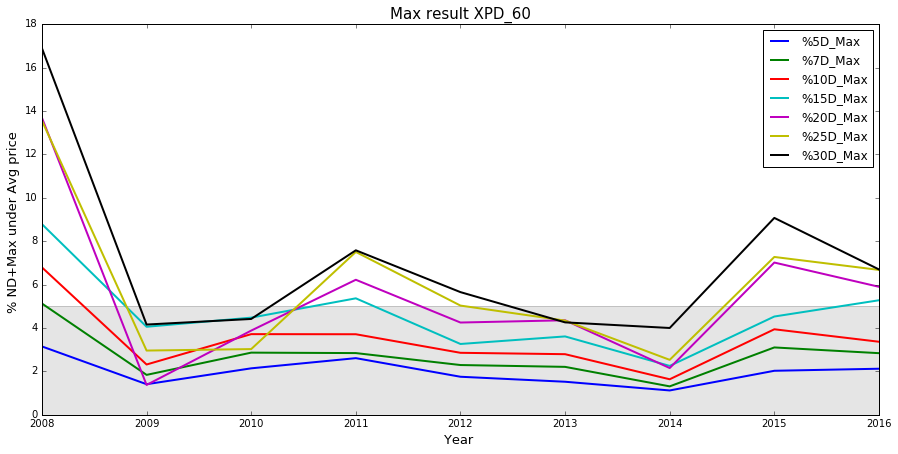

In [53]:
avg_group.plot(x=avg_group.index.astype(str),kind='line',figsize=(15, 7), );
plt.ylabel('% ND+Max under Avg price ',fontsize=13);
plt.xlabel('Year ',fontsize=13);
#plt.axhline(y=5,linewidth=1, color='grey')
plt.axhspan(0, 5, facecolor='0.5', alpha=0.2)
plt.title("Max result " + txtTiker,fontsize=15)
plt.savefig(path+'Max_'+txtTest+'.png');

In [54]:
avg_group.index.astype(str)

Index([u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016'],
      dtype='object', name=u'Year')

In [55]:
names=['Year','Month','Time','Close','Pozition']
avg_df=avg_df.reindex(columns=names)
avg_df[:5]

,Year,Month,Time,Close,Pozition
Date,,,,,
2008-01-02,2008,1,2000,373.55,1
2008-01-03,2008,1,2000,373.65,1
2008-01-04,2008,1,2000,370.38,1
2008-01-07,2008,1,2000,371.50,0
2008-01-08,2008,1,2000,374.75,1


In [56]:
names=['Year','Month','Time','Close','Pozition']
avg_df=avg_df.reindex(columns=names)
avg_df['PozPrev']=avg_df['Pozition'].shift(1) # shift - сдвигает столбец на заданное количество

#periodLong=[1,3,4,6]
#periodOut=[6,10,20,25]
#periodLong=[1,2,3,4,5,7,10,15,20,25]
periodLong=[1,2,3,4,5,6,7,8,9,10,15,20,25]
periodOut=[7,10,15,16,17,18,19,20,21,22,23,24,25]
names_columns=[]
Result_columns=[] # переведенные в строки элементы periodLong, чтобы задать названия столбцов
j=0
deals_avg=0

period=periodOut # начинается торговля с позиции Out
used_avg_period=False

for periodsLong in periodLong: # перебор по periodOut при periodLong постоянном но тоже перебираемом
    names_columns=[]
    for n in range(len(periodLong)):
        _periodLong=periodsLong
        _periodOut=periodOut[n]    
        period=_periodOut # начинается торговля с позиции Out
        used_avg_period=False
        Index_avg=[]
        Deals_avg=[]
        j=0

        for i,row in avg_df.iterrows():   
            rowPozition=row['Pozition']
            rowPozitionPrev=row['PozPrev']
            valueClose=row['Close']
            # получаем разбиение по периодам усреднения        
            if j==period: 
            #if j==period or rowPozition<>rowPozitionPrev : 
                j=0 # сбрасываем счетчик периода
                used_avg_period=False # за время периода усреднения снова нет сделок
                if rowPozition==0:
                    period=_periodOut
                elif rowPozition==1:
                    period=_periodLong             
            j+=1
            Index_avg.append(j)
            # записываем цену в рамках периода усреднения в list
            deals_avg=np.nan
            if used_avg_period==False and rowPozition==0:
                deals_avg=valueClose #=1
                used_avg_period=True 
            if j==_periodLong and used_avg_period==False and rowPozition==1:
                deals_avg=valueClose #=1
                used_avg_period=True    
            Deals_avg.append(deals_avg) 

        #avg_df['Index_avg']=Index_avg  
        # задаем название столбцу без !!!  _periodLong т.к. он меняется по нему первый цикл 
        my_names_columns='N/'+str(_periodOut)+'_Max' 
        avg_df[my_names_columns]=Deals_avg    
        names_columns.append(my_names_columns)

    names_columns.insert(0,'Close') # добавляем название столбца 'Close' в список столбцов
    avg_group=avg_df.groupby(avg_df['Year'])[names_columns].mean()
    
    # делаем процентные изменения
    new_names_columns=[]
    for names_columns_ in names_columns:
        avg_group['% '+names_columns_]=(avg_group[names_columns_]-avg_group['Close'])*100/avg_group['Close']
        new_names_columns.append('% '+names_columns_)
    new_names_columns.pop(0) # удаляем 'Close'
    # cannot reindex from a duplicate axis- была ошибка
    # del avg_group, T.reset_index - решения которые не помогли
    # оказалось что задваиваются столбцы в цикле и нужно просто обнулять names_columns=[]        
    avg_group=avg_group.reindex(columns=new_names_columns) 
    
    if periodsLong==periodLong[0]:# иначе при первом обращении к result=pd.concat([result будет ошибка что result не определен
        result=avg_group.sum()
    else:       
        result=pd.concat([result,avg_group.sum()],axis=1)
    # формируем названия столбцов для result переводя в строковой список _periodLong
    Result_columns.append(str(_periodLong))
        
result.columns=Result_columns 
#result.columns.name='Total year % 2004-2016'
#result.name='N/%'
result.T

,% N/7_Max,% N/10_Max,% N/15_Max,% N/16_Max,% N/17_Max,% N/18_Max,% N/19_Max,% N/20_Max,% N/21_Max,% N/22_Max,% N/23_Max,% N/24_Max,% N/25_Max
1,21.68,9.99,21.66,27.25,32.49,30.25,19.07,13.02,28.00,9.77,23.50,2.32,24.55
2,14.54,6.93,17.39,13.02,15.84,21.75,13.14,12.99,25.79,7.61,12.10,-5.63,20.08
3,7.74,13.00,18.01,12.45,17.31,19.18,5.92,3.39,11.41,4.14,7.15,-0.83,4.39
4,5.78,-1.72,8.92,8.33,12.68,8.05,10.31,1.28,11.52,4.92,20.44,4.14,18.14
5,4.04,5.37,13.22,8.94,10.54,16.15,9.97,12.41,0.95,4.60,9.55,6.28,-4.44
6,0.11,2.40,7.36,8.64,3.38,1.03,10.99,-5.11,11.95,4.70,13.41,1.46,4.61
7,1.47,2.30,9.46,4.38,4.87,12.32,-0.26,-4.27,-2.98,13.58,9.00,-5.54,-9.01
8,-3.55,-1.43,3.32,4.40,5.73,3.53,5.79,5.91,11.20,11.21,5.31,-5.30,7.88
9,-4.68,1.97,6.04,7.64,3.31,8.21,7.87,7.68,8.40,13.77,-1.37,9.43,7.24
10,-4.67,-0.08,1.17,1.94,1.38,7.55,6.79,7.21,5.15,3.30,5.69,-2.54,-1.50


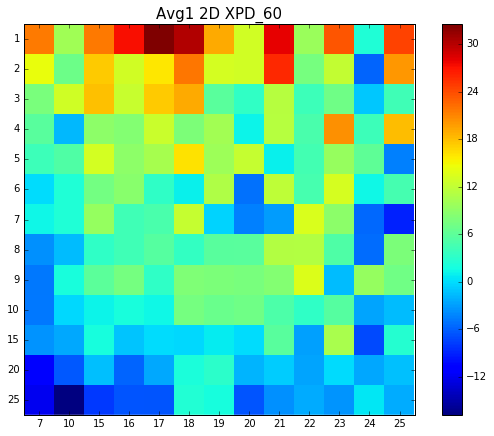

In [57]:
plt.figure(figsize=(10, 7))
plt.imshow(result.T,interpolation='none') 
plt.yticks(range(len(periodLong)), periodLong)
plt.xticks(range(len(periodOut)), periodOut)
plt.title("Avg1 2D " + txtTiker,fontsize=15)
plt.colorbar()
plt.savefig(path+'Avg1_imshow '+txtTest+'.png');

In [58]:
result_NM=result.T.copy()
result_NM[result_NM>15][:10]

,% N/7_Max,% N/10_Max,% N/15_Max,% N/16_Max,% N/17_Max,% N/18_Max,% N/19_Max,% N/20_Max,% N/21_Max,% N/22_Max,% N/23_Max,% N/24_Max,% N/25_Max
1,21.68,nan,21.66,27.25,32.49,30.25,19.07,nan,28.00,nan,23.50,nan,24.55
2,nan,nan,17.39,nan,15.84,21.75,nan,nan,25.79,nan,nan,nan,20.08
3,nan,nan,18.01,nan,17.31,19.18,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,20.44,nan,18.14
5,nan,nan,nan,nan,nan,16.15,nan,nan,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [59]:
to_writer=result_NM[result_NM>15][:10]
to_writer.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=15

In [66]:
# Сделаем в цикле перебор по нескольким period
#periodLong=[1,3,3,6]
#periodOut=[6,10,20,20] #[10]*7 #[5,7,10,15,20,25,30]
periodLong=[1,1,1,1,1,2]
periodOut=[19,20,23,24,25,23]
names_columns=[]
j=0
deals_avg=0

period=periodOut # начинается торговля с позиции Out
used_avg_period=False

for n in range(len(periodLong)):
    _periodLong=periodLong[n]
    _periodOut=periodOut[n]    
    period=_periodOut # начинается торговля с позиции Out
    used_avg_period=False
    #Index_avg=[]
    Deals_avg=[]
    j=0
    
    for i,row in avg_df.iterrows():   
        rowPozition=row['Pozition']
        valueClose=row['Close']
        # получаем разбиение по периодам усреднения
        if j==period:         
            j=0 # сбрасываем счетчик периода
            used_avg_period=False # за время периода усреднения снова нет сделок
            if rowPozition==0:
                period=_periodOut
            elif rowPozition==1:
                period=_periodLong
        j+=1
        #Index_avg.append(j)
        # записываем цену в рамках периода усреднения в list
        deals_avg=np.nan
        if used_avg_period==False and rowPozition==0:
            deals_avg=valueClose #=1
            used_avg_period=True        
        if j==_periodLong and used_avg_period==False and rowPozition==1:
            deals_avg=valueClose #=1
            used_avg_period=True    
        Deals_avg.append(deals_avg)
        
    my_names_columns=str(_periodLong)+'/'+str(_periodOut)+'_Max' # задаем название столбцу    
    avg_df[my_names_columns]=Deals_avg
    names_columns.append(my_names_columns)

names_columns.insert(0,'Close') # добавляем название столбца 'Close' в список столбцов
avg_group=avg_df.groupby(avg_df['Year'])[names_columns].mean()

# делаем процентные изменения
new_names_columns=[]
for names_columns_ in names_columns:
    avg_group['% '+names_columns_]=(avg_group[names_columns_]-avg_group['Close'])*100/avg_group['Close']
    new_names_columns.append('% '+names_columns_)
new_names_columns.pop(0) # удаляем 'Close'
avg_group=avg_group.reindex(columns=new_names_columns)  
avg_group 

,% 1/19_Max,% 1/20_Max,% 1/23_Max,% 1/24_Max,% 1/25_Max,% 2/23_Max
Year,,,,,,
2010,3.44,2.65,2.55,1.54,2.29,0.09
2011,-3.22,-2.06,3.68,3.41,-1.06,-2.23
2012,3.29,2.88,3.72,0.28,1.45,3.31
2013,4.13,3.01,2.90,3.58,4.59,2.43
2014,4.10,4.80,3.95,4.79,1.75,3.24
2015,0.86,2.74,5.03,-1.13,9.31,3.46
2016,3.27,2.66,2.86,5.91,-0.41,5.48


In [67]:
# посчитаем среднее из набора вариантов
avg_group[' ALL ']=avg_group.sum(axis=1)/len(periodLong) # внимание с делителем
avg_group['2 best']=(avg_group.iloc[:,2]+avg_group.iloc[:,3])/2
#avg_group['1/18+4/24']=(avg_group['% 1/18_Max']+avg_group['% 4/24_Max'])/2
avg_group

,% 1/19_Max,% 1/20_Max,% 1/23_Max,% 1/24_Max,% 1/25_Max,% 2/23_Max,ALL,2 best
Year,,,,,,,,
2010,3.44,2.65,2.55,1.54,2.29,0.09,2.09,2.04
2011,-3.22,-2.06,3.68,3.41,-1.06,-2.23,-0.25,3.55
2012,3.29,2.88,3.72,0.28,1.45,3.31,2.49,2.00
2013,4.13,3.01,2.90,3.58,4.59,2.43,3.44,3.24
2014,4.10,4.80,3.95,4.79,1.75,3.24,3.77,4.37
2015,0.86,2.74,5.03,-1.13,9.31,3.46,3.38,1.95
2016,3.27,2.66,2.86,5.91,-0.41,5.48,3.29,4.38


In [68]:
to_writer=avg_group
to_writer.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=20

In [69]:
DataFrame(avg_group.sum()).T

,% 1/19_Max,% 1/20_Max,% 1/23_Max,% 1/24_Max,% 1/25_Max,% 2/23_Max,ALL,2 best
0,15.87,16.68,24.68,18.39,17.92,15.79,18.22,21.54


In [70]:
to_writer=DataFrame(avg_group.sum()).T
to_writer.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=5

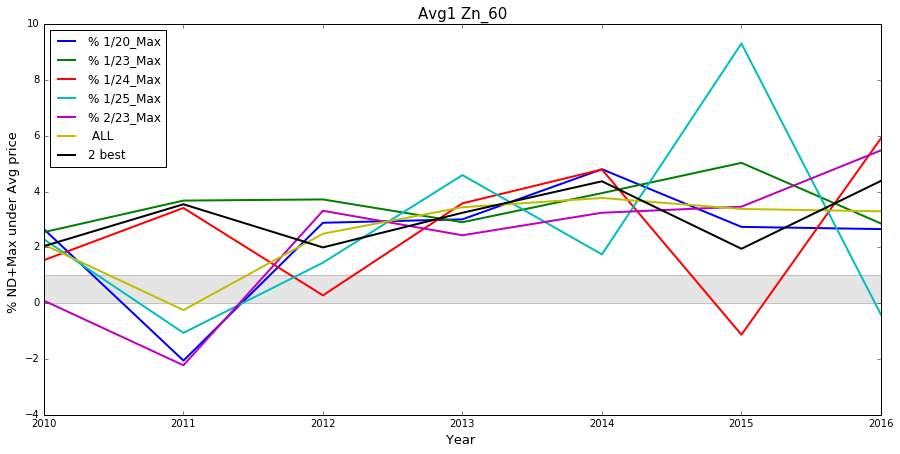

In [71]:
avg_group.drop(avg_group.columns[[0]],inplace=True,axis=1)
avg_group.plot(x=avg_group.index.astype(str),kind='line',figsize=(15, 7) );
plt.ylabel('% ND+Max under Avg price ',fontsize=13);
plt.xlabel('Year ',fontsize=13);
#plt.axhline(y=5,linewidth=1, color='grey')
plt.axhspan(0, 1, facecolor='0.5', alpha=0.2)
plt.title("Avg1 " + txtTiker,fontsize=15)
plt.savefig(path+'Avg1_'+txtTest+'.png');

In [73]:
#результат для второго алгорима усреднения if j==period or rowPozition<>rowPozitionPrev :      
result.T

,% N/7_Max,% N/10_Max,% N/15_Max,% N/16_Max,% N/17_Max,% N/18_Max,% N/19_Max,% N/20_Max,% N/21_Max,% N/22_Max,% N/23_Max,% N/24_Max,% N/25_Max
1,4.87,6.09,6.61,6.76,6.74,6.73,6.69,6.64,6.69,6.68,6.67,6.62,6.62
2,4.39,6.56,7.48,7.77,7.73,7.70,7.64,7.56,7.65,7.63,7.60,7.52,7.52
3,1.73,4.51,5.71,6.10,6.04,5.99,5.90,5.79,5.91,5.88,5.84,5.72,5.72
4,1.60,4.92,6.52,6.97,6.91,6.84,6.75,6.58,6.74,6.70,6.66,6.53,6.53
5,0.32,3.79,5.51,6.02,5.94,5.87,5.75,5.58,5.79,5.74,5.68,5.51,5.51
6,0.46,4.37,6.21,6.79,6.70,6.63,6.51,6.38,6.56,6.51,6.44,6.27,6.27
7,-0.35,3.71,5.84,6.46,6.37,6.30,6.17,5.99,6.20,6.15,6.08,5.93,5.93
8,-1.76,2.38,4.57,5.22,5.10,5.01,4.88,4.60,4.83,4.77,4.70,4.54,4.54
9,-2.80,1.36,3.48,4.20,4.06,3.95,3.80,3.50,3.72,3.66,3.58,3.40,3.40
10,-2.36,1.88,4.07,4.80,4.68,4.58,4.43,4.15,4.39,4.33,4.24,4.06,4.06


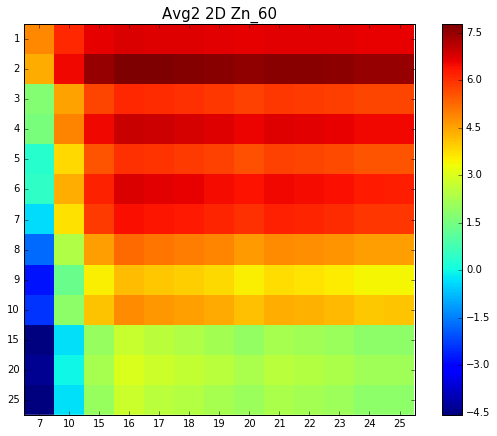

In [74]:
plt.figure(figsize=(10, 7))
plt.imshow(result.T,interpolation='none') 
plt.yticks(range(len(periodLong)), periodLong)
plt.xticks(range(len(periodOut)), periodOut)
plt.title("Avg2 2D " + txtTiker,fontsize=15)
plt.colorbar()
plt.savefig(path+'Avg2_imshow '+txtTest+'.png');

In [76]:
result_NM=result.T.copy()
result_NM[result_NM>7][:10]

,% N/7_Max,% N/10_Max,% N/15_Max,% N/16_Max,% N/17_Max,% N/18_Max,% N/19_Max,% N/20_Max,% N/21_Max,% N/22_Max,% N/23_Max,% N/24_Max,% N/25_Max
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,7.48,7.77,7.73,7.70,7.64,7.56,7.65,7.63,7.60,7.52,7.52
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [77]:
to_writer=result_NM[result_NM>7][:10]
to_writer.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=15

In [78]:
# https://alexanderdyakonov.files.wordpress.com/2015/04/ama2015_pandas.pdf
# Делаем другой алгоритм для усредненных периодов
# Теперь как только позиция открывается/закрывается сразу начинается новый отсчет периода усреднения
names=['Year','Month','Time','Close','Pozition']
avg_df=avg_df.reindex(columns=names)
avg_df['PozPrev']=avg_df['Pozition'].shift(1) # shift - сдвигает столбец на заданное количество

periodLong=[2,2,2]
periodOut=[16,17,18]
#periodLong=[1,2,4]*4
#periodOut=[22,23,24,25]*3
names_columns=[]
j=0
deals_avg=0

period=periodOut # начинается торговля с позиции Out
used_avg_period=False

for n in range(len(periodLong)):
    _periodLong=periodLong[n]
    _periodOut=periodOut[n]    
    period=_periodOut # начинается торговля с позиции Out
    used_avg_period=False
    Index_avg=[]
    Deals_avg=[]
    j=0
    
    for i,row in avg_df.iterrows():   
        rowPozition=row['Pozition']
        rowPozitionPrev=row['PozPrev']
        valueClose=row['Close']
        # получаем разбиение по периодам усреднения        
        if j==period or rowPozition<>rowPozitionPrev :         
            j=0 # сбрасываем счетчик периода
            used_avg_period=False # за время периода усреднения снова нет сделок
            if rowPozition==0:
                period=_periodOut
            elif rowPozition==1:
                period=_periodLong             
        j+=1
        Index_avg.append(j)
        # записываем цену в рамках периода усреднения в list
        deals_avg=np.nan
        if used_avg_period==False and rowPozition==0:
            deals_avg=valueClose #=1
            used_avg_period=True 
        if j==_periodLong and used_avg_period==False and rowPozition==1:
            deals_avg=valueClose #=1
            used_avg_period=True    
        Deals_avg.append(deals_avg) 
        
    #avg_df['Index_avg']=Index_avg    
    my_names_columns=str(_periodLong)+'/'+str(_periodOut)+'_Max' # задаем название столбцу    
    avg_df[my_names_columns]=Deals_avg    
    names_columns.append(my_names_columns)

names_columns.insert(0,'Close') # добавляем название столбца 'Close' в список столбцов
avg_group=avg_df.groupby(avg_df['Year'])[names_columns].mean()

# делаем процентные изменения
new_names_columns=[]
for names_columns_ in names_columns:
    avg_group['% '+names_columns_]=(avg_group[names_columns_]-avg_group['Close'])*100/avg_group['Close']
    new_names_columns.append('% '+names_columns_)
new_names_columns.pop(0) # удаляем 'Close'
avg_group=avg_group.reindex(columns=new_names_columns)  
# del avg_group очистка памяти от  avg_group
avg_group 

,% 2/16_Max,% 2/17_Max,% 2/18_Max
Year,,,
2010,2.73,2.73,2.73
2011,0.45,0.36,0.33
2012,0.74,0.86,0.87
2013,0.70,0.69,0.70
2014,1.01,0.95,0.93
2015,2.01,2.02,2.02
2016,0.13,0.13,0.12


In [79]:
to_writer=avg_group
to_writer.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=20

In [80]:
DataFrame(avg_group.sum()).T

,% 2/16_Max,% 2/17_Max,% 2/18_Max
0,7.77,7.73,7.70


In [81]:
to_writer=DataFrame(avg_group.sum()).T
to_writer.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=5

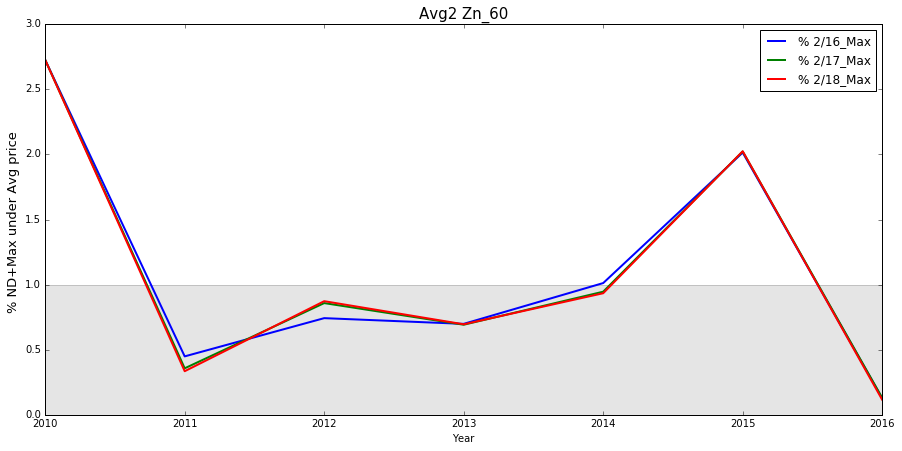

In [82]:
avg_group.plot(x=avg_group.index.astype(str),kind='line',figsize=(15, 7) );
plt.ylabel('% ND+Max under Avg price ',fontsize=13);
#plt.axhline(y=5,linewidth=1, color='grey')
plt.title("Avg2 " + txtTiker,fontsize=15)
plt.axhspan(0, 1, facecolor='0.5', alpha=0.2)
plt.savefig(path+'Avg2_'+txtTest+'.png');

In [83]:
#del test['Index']
test[:5]

,Date,Time,Type,Cnts,Price,Signal_Name
0,15/02/2010,1100,Buy,457,2187.25,OL
1,04/05/2010,1500,LExit,457,2169.75,EL
2,12/05/2010,1100,Buy,474,2107.00,OL
3,14/05/2010,1200,LExit,474,2079.00,EL
4,27/05/2010,1700,Buy,341,1945.00,OL


In [84]:
testBuy=test[test['Type']=='Buy']
testLExit=test[test['Type']=='LExit']
testLExit.reset_index(inplace=True)
testBuy.reset_index(inplace=True)
pd.concat([testBuy,testLExit],axis=1)[:10] 
           
#pd.concat([test[test['Type']=='Buy'],test[test['Type']=='LExit']],axis=1)[:10]  
# так не работает т.к. индексы сохраняются и таблица мерджиться некоректно т.к. помняться старые индексы

,index,Date,Time,Type,Cnts,Price,Signal_Name,index,Date,Time,Type,Cnts,Price,Signal_Name
0,0,15/02/2010,1100,Buy,457,2187.25,OL,1,04/05/2010,1500,LExit,457,2169.75,EL
1,2,12/05/2010,1100,Buy,474,2107.00,OL,3,14/05/2010,1200,LExit,474,2079.00,EL
2,4,27/05/2010,1700,Buy,341,1945.00,OL,5,28/05/2010,1900,LExit,341,1910.00,EL
3,6,08/06/2010,1700,Buy,367,1716.25,OL,7,11/06/2010,1500,LExit,367,1725.00,EL
4,8,15/06/2010,1800,Buy,543,1838.50,OL,9,16/06/2010,1400,LExit,543,1814.50,EL
5,10,30/06/2010,1800,Buy,426,1787.00,OL,11,07/07/2010,1100,LExit,426,1826.00,EL
6,12,21/07/2010,1200,Buy,529,1889.50,OL,13,10/08/2010,1100,LExit,529,2095.50,EL
7,14,12/08/2010,1600,Buy,485,2061.00,OL,15,18/08/2010,1600,LExit,485,2108.75,EL
8,16,27/08/2010,1700,Buy,481,2075.00,OL,17,31/08/2010,1900,LExit,481,2069.00,EL
9,18,01/09/2010,1100,Buy,470,2125.00,OL,19,03/09/2010,1700,LExit,470,2162.50,EL


In [85]:
# наверняка вместо вместо цикла можно сделать через list comprehension
a=[]
k=0
for i in range(10):
    if i%2==0:
        k+=1
    a.append(k)
a

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5]

In [86]:
Index_forPivot=[]
j=0
for i in range(len(test)):
    if i%2==0:
        j+=1
    Index_forPivot.append(j)
    
# test.pivot(index='Cnts', columns='Type', values='Price') 
# Index contains duplicate entries, cannot reshape - Cnts могут иметь одтнаковые значения не пойдет для индекс
test['Index']=Index_forPivot
testPivot=test.pivot(index='Index', columns='Type')
testPivot[:10]

Date              Time       Cnts          Price           \
Type          Buy       LExit   Buy LExit  Buy LExit      Buy    LExit   
Index                                                                    
1      15/02/2010  04/05/2010  1100  1500  457   457  2187.25  2169.75   
2      12/05/2010  14/05/2010  1100  1200  474   474  2107.00  2079.00   
3      27/05/2010  28/05/2010  1700  1900  341   341  1945.00  1910.00   
4      08/06/2010  11/06/2010  1700  1500  367   367  1716.25  1725.00   
5      15/06/2010  16/06/2010  1800  1400  543   543  1838.50  1814.50   
6      30/06/2010  07/07/2010  1800  1100  426   426  1787.00  1826.00   
7      21/07/2010  10/08/2010  1200  1100  529   529  1889.50  2095.50   
8      12/08/2010  18/08/2010  1600  1600  485   485  2061.00  2108.75   
9      27/08/2010  31/08/2010  1700  1900  481   481  2075.00  2069.00   
10     01/09/2010  03/09/2010  1100  1700  470   470  2125.00  2162.50   

      Signal_Name        
Type          Buy LExit  
Index                    
1              OL    EL  
2              OL    EL  
3              OL    EL  
4              OL    EL  
5              OL    EL  
6              OL    EL  
7              OL    EL  
8              OL    EL  
9              OL    EL  
10             OL    EL

In [87]:
testPivot['Deals']=(testPivot['Price','LExit']*testPivot['Cnts','LExit']-
                    testPivot['Price','Buy']*testPivot['Cnts','Buy'])*100/(testPivot['Price','Buy']*testPivot['Cnts','Buy'])
testPivot[:10]

Date              Time       Cnts          Price           \
Type          Buy       LExit   Buy LExit  Buy LExit      Buy    LExit   
Index                                                                    
1      15/02/2010  04/05/2010  1100  1500  457   457  2187.25  2169.75   
2      12/05/2010  14/05/2010  1100  1200  474   474  2107.00  2079.00   
3      27/05/2010  28/05/2010  1700  1900  341   341  1945.00  1910.00   
4      08/06/2010  11/06/2010  1700  1500  367   367  1716.25  1725.00   
5      15/06/2010  16/06/2010  1800  1400  543   543  1838.50  1814.50   
6      30/06/2010  07/07/2010  1800  1100  426   426  1787.00  1826.00   
7      21/07/2010  10/08/2010  1200  1100  529   529  1889.50  2095.50   
8      12/08/2010  18/08/2010  1600  1600  485   485  2061.00  2108.75   
9      27/08/2010  31/08/2010  1700  1900  481   481  2075.00  2069.00   
10     01/09/2010  03/09/2010  1100  1700  470   470  2125.00  2162.50   

      Signal_Name        Deals  
Type          Buy LExit         
Index                           
1              OL    EL  -0.80  
2              OL    EL  -1.33  
3              OL    EL  -1.80  
4              OL    EL   0.51  
5              OL    EL  -1.31  
6              OL    EL   2.18  
7              OL    EL  10.90  
8              OL    EL   2.32  
9              OL    EL  -0.29  
10             OL    EL   1.76

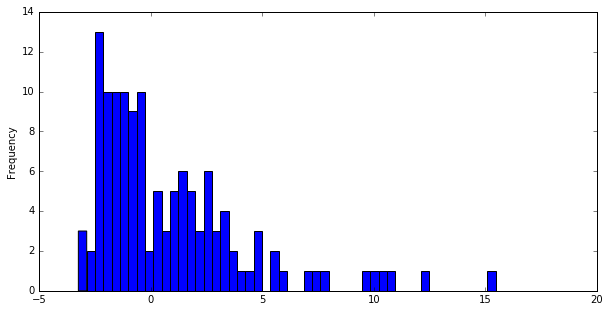

In [88]:
#testPivot['Deals'].plot(kind='kde');
testPivot['Deals'].plot(kind='hist',bins=50,figsize=(10, 5));

In [89]:
from datetime import datetime
Duration=(pd.to_datetime(testPivot['Date','LExit'],dayfirst=True)-pd.to_datetime(testPivot['Date','Buy'],dayfirst=True))
print Duration[:5] # dtype: timedelta64[ns], подпись days после указания числа 
print Duration[1],type(Duration[1]) # dtype Timedelta
# http://stackoverflow.com/questions/26456825/convert-timedelta64ns-column-to-seconds-in-python-pandas-dataframe
# т.е. когда одно значение то это объект Timedelta, когда Serios из Timedelta это уже объект timedelta64[ns]
# метод days  выделяющий из дни как int есть только у объекта Timedelta
# как преобразовать к типу int?
# 1 способ
Duration_int=Duration/ np.timedelta64(1, 'D')
print Duration_int[:5]
# 2 способ
Duration_int=[Durations.days for Durations in Duration]

print Duration_int[:5]

Index
1   78 days
2    2 days
3    1 days
4    3 days
5    1 days
dtype: timedelta64[ns]
78 days 00:00:00 <class 'pandas.tslib.Timedelta'>
Index
1    78.00
2     2.00
3     1.00
4     3.00
5     1.00
dtype: float64
[78L, 2L, 1L, 3L, 1L]


In [90]:
testPivot['Duration']=Duration_int
# для формирования подписей делаем текстовую дату
TextData=testPivot['Date','Buy'].astype(str)+' - '+testPivot['Date','LExit'].astype(str)
testPivot['Text data']=TextData
testPivot[:10]

Date              Time       Cnts          Price           \
Type          Buy       LExit   Buy LExit  Buy LExit      Buy    LExit   
Index                                                                    
1      15/02/2010  04/05/2010  1100  1500  457   457  2187.25  2169.75   
2      12/05/2010  14/05/2010  1100  1200  474   474  2107.00  2079.00   
3      27/05/2010  28/05/2010  1700  1900  341   341  1945.00  1910.00   
4      08/06/2010  11/06/2010  1700  1500  367   367  1716.25  1725.00   
5      15/06/2010  16/06/2010  1800  1400  543   543  1838.50  1814.50   
6      30/06/2010  07/07/2010  1800  1100  426   426  1787.00  1826.00   
7      21/07/2010  10/08/2010  1200  1100  529   529  1889.50  2095.50   
8      12/08/2010  18/08/2010  1600  1600  485   485  2061.00  2108.75   
9      27/08/2010  31/08/2010  1700  1900  481   481  2075.00  2069.00   
10     01/09/2010  03/09/2010  1100  1700  470   470  2125.00  2162.50   

      Signal_Name        Deals Duration                Text data  
Type          Buy LExit                                           
Index                                                             
1              OL    EL  -0.80       78  15/02/2010 - 04/05/2010  
2              OL    EL  -1.33        2  12/05/2010 - 14/05/2010  
3              OL    EL  -1.80        1  27/05/2010 - 28/05/2010  
4              OL    EL   0.51        3  08/06/2010 - 11/06/2010  
5              OL    EL  -1.31        1  15/06/2010 - 16/06/2010  
6              OL    EL   2.18        7  30/06/2010 - 07/07/2010  
7              OL    EL  10.90       20  21/07/2010 - 10/08/2010  
8              OL    EL   2.32        6  12/08/2010 - 18/08/2010  
9              OL    EL  -0.29        4  27/08/2010 - 31/08/2010  
10             OL    EL   1.76        2  01/09/2010 - 03/09/2010

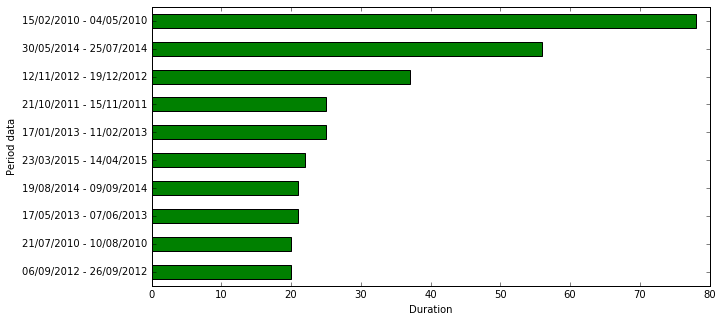

In [91]:
Duration_forGraf=testPivot[['Duration','Text data']].sort_values('Duration')[-10:]
Duration_forGraf.plot(kind='barh',color='green',legend=False,figsize=(10, 5))
plt.yticks(np.arange(len(Duration_forGraf)),Duration_forGraf['Text data'],rotation=0) # каж
plt.ylabel('Period data')
plt.xlabel('Duration');

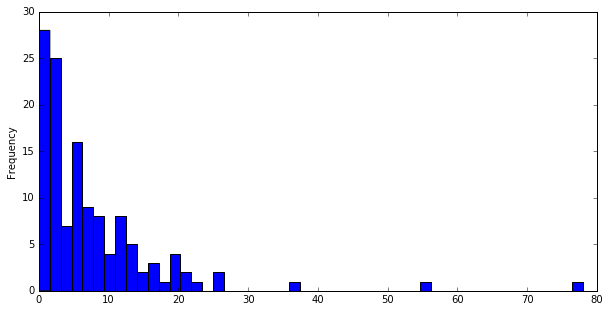

In [92]:
testPivot['Duration'].plot(kind='hist',bins=50,figsize=(10, 5));

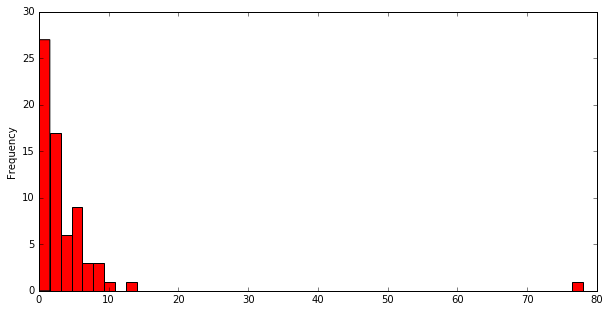

In [93]:
# на этом же графике можно построить медиану как вертикальную линию
testPivot[testPivot['Deals']<=0]['Duration'].plot(kind='hist',bins=50,color='red',figsize=(10, 5));

In [94]:
# Данные о сделках содержат перечень сделок в таймфрейме 60/120/240 минут, для теста дополнительных ордеров на основе 
# первичного алгоритма используется таймфрейм - дневной, т.е все сделки идут с частотой раз в день в 2000,
# поэтому данные о сдлеках первоначально должны быть свернуты в формат дневной с данными на 2000
# при этом заполнить нужно только столбец Signal_Name_Номер задержки, Pozition_Name_Номер задержки актуален только для построения
# Open/Close EquityCurve где используются все данные,а не сжатые до 2000 как в текущей задаче

# shift - сдвигает столбец на заданное количество
is_date=(merge_df['Type']<>0) | (merge_df['Time']==2000) #  & and  ^ / | or , ^ - исключающее или
date=merge_df[is_date]

is_BuyLExit=(date['Type'].shift(1)=='Buy') & (date['Type']=='LExit') | (date['Type'].shift(-1)=='LExit') & (date['Type']=='Buy')
is_LExitBuy=(date['Type'].shift(1)=='LExit') & (date['Type']=='Buy') | (date['Type'].shift(-1)=='Buy') & (date['Type']=='LExit')

date_raw=date[is_BuyLExit | is_LExitBuy]
# близкие даты с входами/выходами на которые нужно обратить внимание
print date_raw.loc[:,'Date':'Type']

date=date[is_BuyLExit==False] # оно если LExit Time=2000 такаю строку не нужно отфильтровывать
date=date.reset_index()
date[:5]
#data=data[is_BuyLExit | is_LExitBuy]

             Date  Time     Open     High      Low    Close   Type
3121   04/01/2011  1200  2448.00  2476.00  2445.00  2471.00    Buy
3126   04/01/2011  1700  2474.00  2476.00  2443.00  2443.00  LExit
4038   16/03/2011  1300  2322.00  2334.50  2320.00  2332.00    Buy
4043   16/03/2011  1800  2318.00  2322.00  2287.00  2292.25  LExit
5836   10/08/2011  1400  2160.00  2172.75  2155.50  2170.00    Buy
5838   10/08/2011  1600  2154.25  2160.00  2133.00  2135.00  LExit
7254   30/11/2011  1100  1930.00  1930.00  1917.50  1917.50  LExit
7258   30/11/2011  1500  1942.00  1996.00  1942.00  1990.00    Buy
8348   29/02/2012  1100  2136.00  2146.00  2133.00  2145.00    Buy
8355   29/02/2012  1800  2132.00  2132.00  2085.00  2109.50  LExit
10998  02/10/2012  1100  2109.25  2130.00  2109.25  2127.00    Buy
11003  02/10/2012  1600  2119.00  2122.00  2107.00  2109.00  LExit
15726  16/10/2013  1100  1926.00  1927.00  1892.00  1899.75  LExit
15731  16/10/2013  1600  1906.75  1922.25  1906.50  1922.00   

,index,Date,Time,Open,High,Low,Close,Type,Cnts,Price,Signal_Name,Pozition
0,5,12/02/2010,2000,2172.00,2172.00,2165.00,2165.00,0,0.00,0.00,0,0
1,11,15/02/2010,1100,2170.00,2195.00,2170.00,2187.25,Buy,457.00,2187.25,OL,1
2,20,15/02/2010,2000,2200.00,2208.00,2200.00,2208.00,0,0.00,0.00,0,1
3,35,16/02/2010,2000,2333.00,2333.00,2325.00,2327.00,0,0.00,0.00,0,1
4,51,17/02/2010,2000,2314.75,2315.00,2311.00,2311.00,0,0.00,0.00,0,1


In [95]:
# shift не работает при итерациях поэтому необходимо сначала сделать доп. столбец 
date['Signal_Name_shift']=date.Signal_Name.shift(1)
date['Time_shift']=date.Time.shift(1)

Signal_Name_New=[]
Pozition_New=[]
POZ_original=0
signal_Name_New=0
pozition_New=0 

for i,row in date.iterrows():     
    signal_Name_New=0
    if  row['Time']==2000: # записываем только когда время кратно 2000
        if POZ_original==1:
            pozition_New+=1
        else: pozition_New-=1        
        
    if  (row['Signal_Name_shift']=='OL' and row['Time']==2000 and row['Time_shift']<>2000) or (row['Signal_Name']=='OL'and row['Time']==2000):
        signal_Name_New='OL'
        POZ_original=1
        pozition_New=0
    if (row['Signal_Name_shift']=='EL' or row['Signal_Name_shift']=='ELS'
        or row['Signal_Name']=='EL' or row['Signal_Name']=='ELS') and row['Time']==2000 :
    # if  row.Signal_Name_shift.isin('EL','ELS') or row.Signal_Name.isin('EL','ELS') and row['Time']==2000 : float' object has no attribute 'isin'   
        signal_Name_New='EL'
        POZ_original=0
        pozition_New=0
  
    Signal_Name_New.append(signal_Name_New)
    Pozition_New.append(pozition_New) 

date['Signal_Name_New']=Signal_Name_New
date['Pozition_New']=Pozition_New

# проверка получившейся датабазы
is_correct=(date['Signal_Name']<>0) & (date['Signal_Name_shift']<>0)
is_correct=(date['Time']<>2000) & (date['Signal_Name_New']<>0 ) #| data['Pozition_New']<>0
#data[is_correct]

date=date[date.Time==2000]
#data.drop(data.columns[[2,3,4]],inplace=True,axis=1)
# data.pop - удаление по именам столбцов
names=['Date','Time','Signal_Name_New','Pozition_New']
date=date.reindex(columns=names)
date.tail(10)

,Date,Time,Signal_Name_New,Pozition_New
1762,23/05/2016,2000,EL,0
1763,24/05/2016,2000,0,-1
1764,25/05/2016,2000,0,-2
1766,26/05/2016,2000,OL,0
1767,27/05/2016,2000,0,1
1768,31/05/2016,2000,0,2
1769,01/06/2016,2000,0,3
1770,02/06/2016,2000,0,4
1771,03/06/2016,2000,0,5
1772,06/06/2016,2000,EL,0


In [96]:
merge_delaytrade=pd.merge(merge_df,date,on=['Date','Time'],how='outer') 
merge_delaytrade.fillna(0,inplace=True)
#merge_delaytrade[:500]
#merge_delaytrade[merge_delaytrade['Signal_Name_New']<>0][:25]
merge_delaytrade[merge_delaytrade['Time']==2000][:20]
#print len(merge_delaytrade)

,Date,Time,Open,High,Low,Close,Type,Cnts,Price,Signal_Name,Pozition,Signal_Name_New,Pozition_New
5,12/02/2010,2000,2172.00,2172.00,2165.00,2165.00,0,0.00,0.00,0,0,0,-1.00
20,15/02/2010,2000,2200.00,2208.00,2200.00,2208.00,0,0.00,0.00,0,1,OL,0.00
35,16/02/2010,2000,2333.00,2333.00,2325.00,2327.00,0,0.00,0.00,0,1,0,1.00
51,17/02/2010,2000,2314.75,2315.00,2311.00,2311.00,0,0.00,0.00,0,1,0,2.00
69,18/02/2010,2000,2294.50,2310.00,2290.00,2300.00,0,0.00,0.00,0,1,0,3.00
86,19/02/2010,2000,2360.00,2362.00,2352.00,2362.00,0,0.00,0.00,0,1,0,4.00
95,22/02/2010,2000,2345.00,2347.00,2329.00,2332.50,0,0.00,0.00,0,1,0,5.00
101,04/05/2010,2000,2141.00,2143.00,2135.00,2135.00,0,0.00,0.00,0,0,EL,0.00
119,05/05/2010,2000,2117.50,2121.50,2113.75,2118.50,0,0.00,0.00,0,0,0,-1.00
137,06/05/2010,2000,2113.25,2115.25,2098.00,2098.00,0,0.00,0.00,0,0,0,-2.00


In [97]:
merge_delaytrade["Close"]=merge_delaytrade["Close"].astype(float) # если Close будет int то не будет расчитываться DrawDown
# и все расчеты EquityCurves переменных будут int при Cnts=int(InitalCapital/PozEnter) лучше переписать на деление без остатка

Day_ofDelay=5
Portion=[1./Day_ofDelay]*Day_ofDelay

N_OpenEquityCurves=np.zeros((Day_ofDelay,len(merge_delaytrade))) # двойные скобки
N_CloseEquityCurves=np.zeros((Day_ofDelay,len(merge_delaytrade)))
N_DrawDownLines=np.zeros((Day_ofDelay,len(merge_delaytrade))) # возможно нужно отдельно считать по суммарной эквити
InitalCapital=1000000. # начальное значение EquityCurve

openEquityCurve=closeEquityCurve=InitalCapital # инициализируем первоначальное значение EquityCurve
#closeEquityCurve=InitalCapital
maxEquityCurve=InitalCapital # инициализируем MaxEquityCurve для расчета DrawDownLine 

for n in range(Day_ofDelay):
    openEquityCurve=closeEquityCurve=InitalCapital # инициализируем первоначальное значение EquityCurve
    #closeEquityCurve=InitalCapital
    maxEquityCurve=InitalCapital # инициализируем MaxEquityCurve для расчета DrawDownLine 
    equityCurve_=grossResult=0   # инициализируем нулями бля более безпасного кода, допустим не будет закрыта последняя сделка
    Pozition_n=0
    OpenEquityCurve=[]
    CloseEquityCurve=[]
    DrawDownLine=[]
    PozEnter=Cnts=0
    
    for i,row in merge_delaytrade.iterrows(): 
        if n==0:
        # расчет кривой EquityCurve
            if row['Signal_Name']=='OL' :
                PozEnter=row['Price']
                Cnts=row['Cnts']
                equityCurve_=openEquityCurve # при открытии позиции и закрытии openEquityCurve и closeEquityCurve совпадают!
            if row['Pozition']==1 :
                grossResult=Cnts*(row['Close']-PozEnter)  
                openEquityCurve=equityCurve_+grossResult   
            if row['Signal_Name']=='EL' or row['Signal_Name']=='ELS':
                grossResult=Cnts*(row['Price']-PozEnter) # row['Price'] а не row['Close'] поскольу при 'Signal_Name'=='ELS' выход не по Close
                openEquityCurve=equityCurve_+grossResult  
                closeEquityCurve=openEquityCurve
                PozEnter=0
                Cnts=0
        else:
            if row['Pozition_New']==n : # позиция открыта с задержкой надевном баре
                PozEnter=row['Close']
                #Cnts=int(InitalCapital/PozEnter)
                Cnts=InitalCapital//PozEnter # целочисленное деление
                Pozition_n=1 
                equityCurve_=openEquityCurve # при открытии позиции и закрытии openEquityCurve и closeEquityCurve совпадают!
            if Pozition_n==1 : #and row['Pozition_New']>n
                grossResult=Cnts*(row['Close']-PozEnter)  
                openEquityCurve=equityCurve_+grossResult 
            if row['Pozition_New']==n*(-1) and Pozition_n==1: # позиция закрыта с задержкой надевном баре
                grossResult=Cnts*(row['Close']-PozEnter) 
                openEquityCurve=equityCurve_+grossResult
                closeEquityCurve=openEquityCurve
                PozEnter=0
                Cnts=0
                Pozition_n=0
                
        OpenEquityCurve.append(openEquityCurve)
        CloseEquityCurve.append(closeEquityCurve) 
        # расчет кривой DrawDown% 
        maxEquityCurve=max(maxEquityCurve,openEquityCurve)
        drawDownLine=(openEquityCurve-maxEquityCurve)/maxEquityCurve*100 # drawDownLine в %       
        DrawDownLine.append(drawDownLine)

    # записываем результат в двумерный массив, где строки это результат отдельной N-delay equity
    N_OpenEquityCurves[n]=OpenEquityCurve
    N_CloseEquityCurves[n]=CloseEquityCurve
    N_DrawDownLines[n]=DrawDownLine   
    
print N_OpenEquityCurves [:,-5:] # [:,:2] а не [:;:2]

[[ 2034022.45  2034287.95  2031898.45  2032429.45  2034287.95]
 [ 1648503.25  1648765.75  1646403.25  1646928.25  1648765.75]
 [ 1439063.75  1439323.75  1436983.75  1437503.75  1439323.75]
 [ 1300243.    1300497.    1298211.    1298719.    1300497.  ]
 [ 1147461.    1147713.5   1145441.    1145946.    1147713.5 ]]


In [98]:
print N_DrawDownLines [:,-5:]

[[  0.           0.          -0.11746125  -0.09135875   0.        ]
 [ -0.62671057  -0.61088682  -0.75330049  -0.72165301  -0.61088682]
 [ -5.30894549  -5.29183737  -5.44581044  -5.41159421  -5.29183737]
 [-13.69898655 -13.68212781 -13.83385646 -13.80013899 -13.68212781]
 [-16.44696386 -16.42857793 -16.59405133 -16.55727946 -16.42857793]]


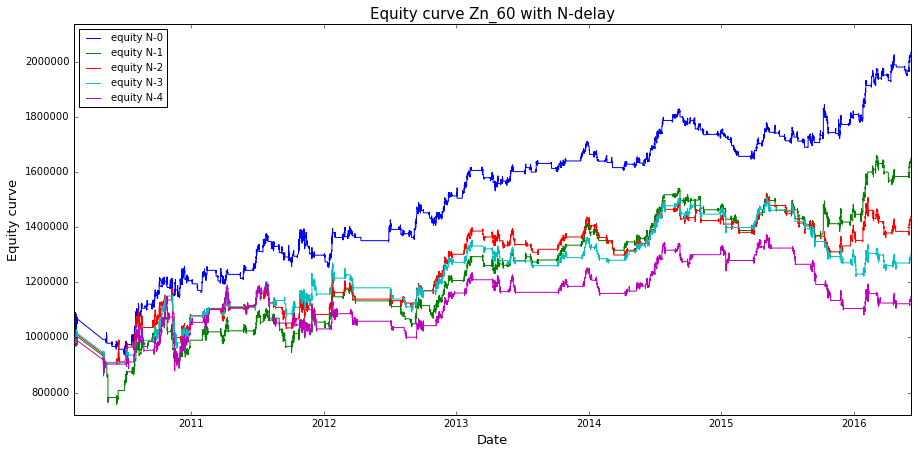

In [99]:
plt.figure(figsize=(15, 7))
for n in range(Day_ofDelay):
    plt.plot(Date,N_OpenEquityCurves[n],linewidth=1,alpha=1,label='equity N-'+str(n))
plt.xlabel('Date',fontsize=13)
plt.ylabel('Equity curve',fontsize=13)
plt.ylim(0.95*np.min(N_OpenEquityCurves),1.05*np.max(N_OpenEquityCurves))
plt.title('Equity curve '+ txtTiker +' with N-delay',fontsize=15)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.legend(loc='best',fontsize=10)
plt.savefig(path+'N-delay_'+txtTest+'.png');

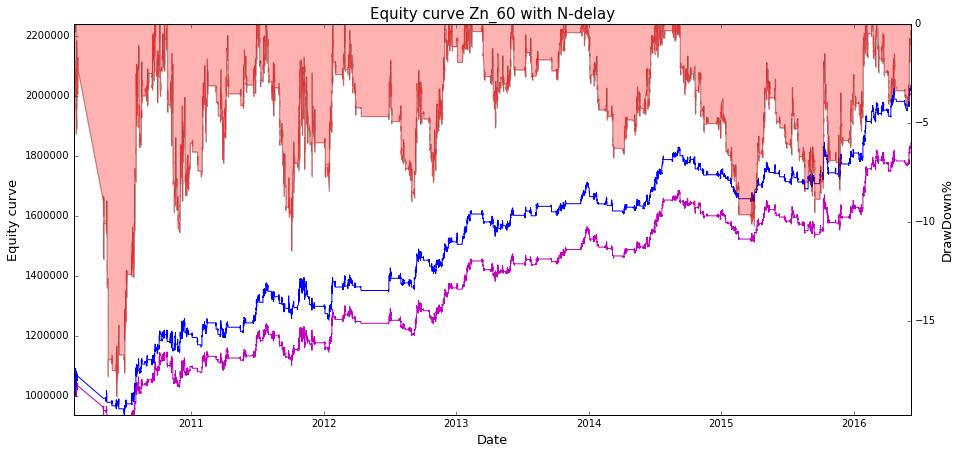

In [100]:
OpenEquityCurve=(N_OpenEquityCurves[0]+N_OpenEquityCurves[1])/2
DrawDownLine=(N_DrawDownLines[0]+N_DrawDownLines[1])/2

plt.figure(figsize=(15, 7))
plt.plot(Date,OpenEquityCurve,"m-",linewidth=1,alpha=1)
plt.plot(Date,N_OpenEquityCurves[0],"b-",linewidth=1,alpha=1)
#plt.plot(CloseEquityCurve,"g-",linewidth=1)
plt.xlabel('Date',fontsize=13)
plt.ylabel('Equity curve',fontsize=13)
#plt.ylim(min(OpenEquityCurve),1.05*max(OpenEquityCurve))
plt.ylim(min(N_OpenEquityCurves[0]),1.10*max(N_OpenEquityCurves[0]))

plt.twinx()
plt.plot(Date,DrawDownLine,"r-",linewidth=0.5,alpha=0.60)
plt.ylabel('DrawDown%',fontsize=13)
plt.ylim(1.05*min(DrawDownLine),0)

plt.title('Equity curve '+ txtTiker +' with N-delay',fontsize=15)
#plt.xlim('2008-01-01','2009-01-01')
plt.fill_between(Date, 0, DrawDownLine, facecolor='red',alpha=0.30)
plt.savefig(path+'N-delay best '+ txtTest + '.png')
plt.show();

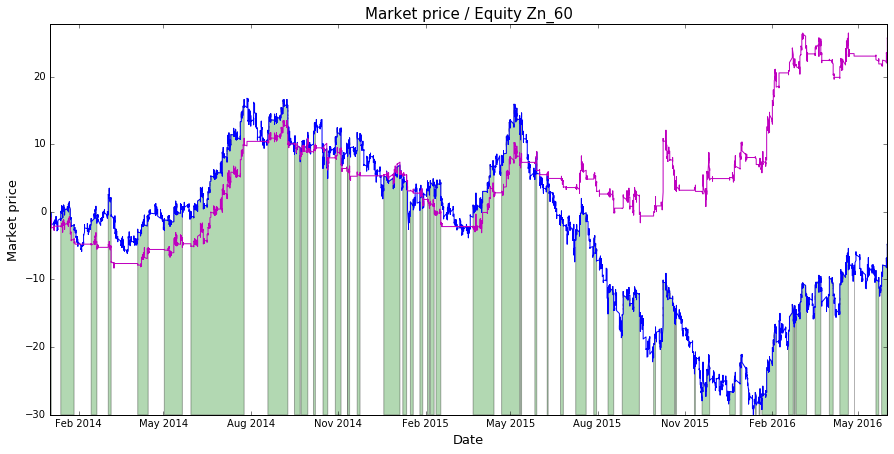

In [101]:
MarketPrice=merge_delaytrade['Close']
MarketPrice.index=Date
StartData=parse('2014-01-01')
EndData=parse('2016-06-01')
EndAllData=Date[-1]

Date_ind=Date.slice_locs(start=StartData, end=EndData)
MarketPrice_forGraf=MarketPrice[StartData:EndData]
OpenEquityCurve_Series=pd.Series(OpenEquityCurve,index=Date) # выбираем кривую эквити с которой сравниваем график цены
OpenEquityCurve_forGraf=OpenEquityCurve_Series[StartData:EndData]

#MarketPrice_forGraf=MarketPrice_forGraf.pct_change().cumsum()*100
#OpenEquityCurve_forGraf=OpenEquityCurve_forGraf.pct_change().cumsum()*100
MarketPrice_forGraf_Start=MarketPrice[Date_ind[0]]  #[StartData] так нельзя вызвать нужен номер, т.к MarketPrice_forGraf_Start не объект Datetimeindex
OpenEquityCurve_forGraf_Start=OpenEquityCurve_Series[Date_ind[0]]
MarketPrice_forGraf=(MarketPrice_forGraf*100/MarketPrice_forGraf_Start)-100
OpenEquityCurve_forGraf=((OpenEquityCurve_forGraf*100/OpenEquityCurve_forGraf_Start)-100)*1.5

Date_forGraf=MarketPrice_forGraf.index # необходим для fill_between where=merge_df['Pozition'][Date_ind[0]:Date_ind[1]]==1

plt.figure(figsize=(15, 7))
plt.plot(MarketPrice_forGraf,"b-",linewidth=1,alpha=1)
plt.plot(OpenEquityCurve_forGraf,"m-",linewidth=1,alpha=1)
plt.xlabel('Date',fontsize=13)
plt.ylabel('Market price',fontsize=13)
plt.ylim(np.min([MarketPrice_forGraf,OpenEquityCurve_forGraf]),1.05*np.max([MarketPrice_forGraf,OpenEquityCurve_forGraf]))

plt.title('Market price / Equity ' + txtTiker,fontsize=15)
# все аргументы Data_forGraf, MarketPrice_forGraf, и where! должны быть одной размерности иначе будет ошибка
# Argument dimensions are incompatible

# where=merge_df а не merge_delaytrade
plt.fill_between(Date_forGraf,np.min([MarketPrice_forGraf,OpenEquityCurve_forGraf]), 
                 MarketPrice_forGraf,where=merge_df['Pozition'][Date_ind[0]:Date_ind[1]]==1, facecolor='green',alpha=0.30)
#plt.fill_between(Data_forGraf,0, 1.05*max(MarketPrice_forGraf),where=merge_df['Pozition'][Date_ind[0]:Date_ind[1]]==1, facecolor='green',alpha=0.30)
plt.savefig(path+'Market price vs N-delay_1.5X '+txtTest+'.png')
plt.show()

In [102]:
names=['Date','Year','Month','Time','Close','Pozition','Signal_Name_New','Pozition_New']
delay_trade=merge_delaytrade.reindex(columns=names)
delay_trade.index=pd.to_datetime(delay_trade.Date,dayfirst=True)
delay_trade['Year']=delay_trade.index.year
delay_trade['Month']=delay_trade.index.month
# задаем кривые эквити которые будем анализировать
delay_trade['N_0']=N_OpenEquityCurves[0]
delay_trade['N_1']=N_OpenEquityCurves[1]
delay_trade['N_2']=N_OpenEquityCurves[2]
#delay_trade['N_3']=N_OpenEquityCurves[3]
#delay_trade['N_4']=N_OpenEquityCurves[4]
delay_trade['N_01']=OpenEquityCurve
# формируем первые значения по которым рассчитываем % по первому году в groupby таблице
first_line=delay_trade.iloc[0,:]
delay_trade_groupby=delay_trade.groupby(delay_trade['Year']).last()

#names=['Close','N_0','N_1','N_2','N_3','N_4','N_04']
names=['Close','N_0','N_1','N_2','N_01']
delay_trade_groupby=delay_trade_groupby.reindex(columns=names)
# вставляем строку от которой начнется расчет
delay_trade_groupby.loc[2000]=[first_line[4],first_line[8],first_line[9],first_line[10],first_line[11]]
delay_trade_groupby.sort_index(inplace=True)
delay_trade_groupby.pct_change()*100

,Close,N_0,N_1,N_2,N_01
Year,,,,,
2000,nan,nan,nan,nan,nan
2010,13.98,20.57,-1.03,7.84,9.77
2011,-24.82,7.67,6.62,0.44,7.20
2012,12.74,16.56,14.32,20.14,15.55
2013,-1.00,11.89,15.41,8.69,13.45
2014,5.84,2.89,5.59,1.15,4.11
2015,-26.27,3.83,-0.22,-2.75,1.98
2016,26.23,12.47,12.40,3.45,12.44


In [103]:
to_writer=delay_trade_groupby.pct_change()*100
to_writer.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=20

In [104]:
DataFrame(delay_trade_groupby.pct_change().sum()*100).T

,Close,N_0,N_1,N_2,N_01
0,6.70,75.88,53.09,38.96,64.50


In [105]:
to_writer=DataFrame(delay_trade_groupby.pct_change().sum()*100).T
to_writer.to_excel(writer,txtTest,startrow=_startrow)
_startrow+=5
writer.save() # эта запись только в конце иначе затираются предидущие данные

In [60]:
writer.save() # эта запись только в конце иначе затираются предидущие данные